In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [93]:
df = pd.read_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/year4.tsv', sep="\t", names=["Target", "ID", "Person","Date", "Institute", "Location"])
# increase display size of tables in the notebook and create a table of the top 50 people who ordered the most based on each year as a column and sort values based on the row sum after tr
df['Year'] = pd.DatetimeIndex(df['Date']).year

pd.set_option('display.max_rows', 0)
yearlypi = df.groupby('Year')['Person'].value_counts().unstack().fillna(0).astype(int).T
yearlyins = df.groupby('Year')['Institute'].value_counts().unstack().fillna(0).astype(int).T

# now sort this based on row sum
yearlypi.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/year4pi.csv')
yearlyins.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/year4ins.csv')

pd.DataFrame(df['Person'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/toppeopleyear4.csv')
pd.DataFrame(df['Institute'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/topinsyear4.csv')

In [94]:
dfall = pd.read_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/allyears.tsv', sep="\t", )
dfall.columns =["Target", "ID", "Person","Date", "Institute", "Location"]

dfall['Year'] = pd.DatetimeIndex(dfall['Date']).year

pd.set_option('display.max_rows', 0)
yearlypi = dfall.groupby('Year')['Person'].value_counts().unstack().fillna(0).astype(int).T
yearlyins = dfall.groupby('Year')['Institute'].value_counts().unstack().fillna(0).astype(int).T

# now sort this based on row sum
yearlypi.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/allyearspi.csv')
yearlyins.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/allyearsins.csv')

pd.DataFrame(dfall['Person'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/toppeopleallyears.csv')
pd.DataFrame(dfall['Institute'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/topinsallyears.csv')

In [51]:
# concatenate the two dataframes
df = pd.concat([df, dfall], ignore_index=True)
# drop duplicates
df = df.drop_duplicates()


In [52]:
df

,Target,ID,Person,Date,Institute,Location
0,Anti-PINK1 [N4/15R],177546,Angelika Harbauer,3/31/2023,Max Planck Institute for Biological Intelligence,DE
1,Anti-PSD-95 [K28/43R] (Recombinant Antibody),180082-rAb,Michael Salling,3/30/2023,Louisiana State University Health Sciences Cen...,US
2,IRSp53/BAIAP2 scFv [L117/1],190506,Dr Vanessa D'Costa,3/30/2023,University of Ottawa,CA
3,Anti-Calbindin [L109/57R],177455,Mingjie Zhang,3/30/2023,Hong Kong University of Science and Technology,HK
4,Anti-mGluR1/5 (Group I) glutamate receptor [N7...,182119,Mingjie Zhang,3/30/2023,Hong Kong University of Science and Technology,HK
...,...,...,...,...,...,...
1735,Anti-QKI-6 [N182/17.1R],114561,Gavin Wright,11/28/2018,Wellcome Sanger Institute,GB
1736,Anti-VGlut2 [N29/29R],114501,George Church,11/26/2018,Harvard Medical School,US
1737,Anti-Neuroligin-3 [N110/29.4R],114518,George Church,11/26/2018,Harvard Medical School,US
1738,Anti-GluA1/GluR1 glutamate receptor [N355/1R],114483,George Church,11/26/2018,Harvard Medical School,US


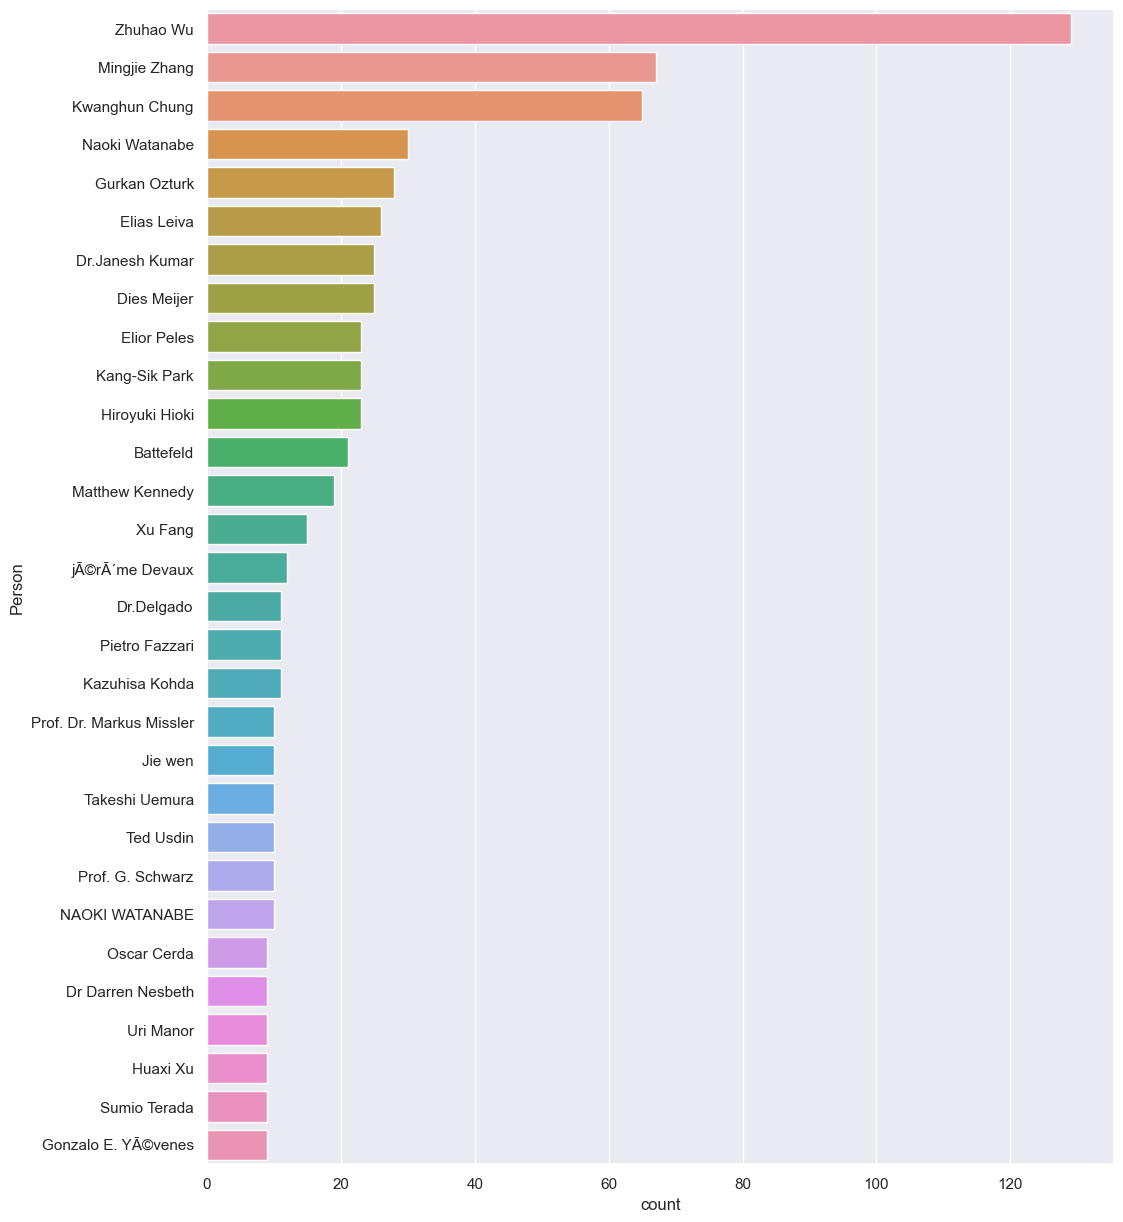

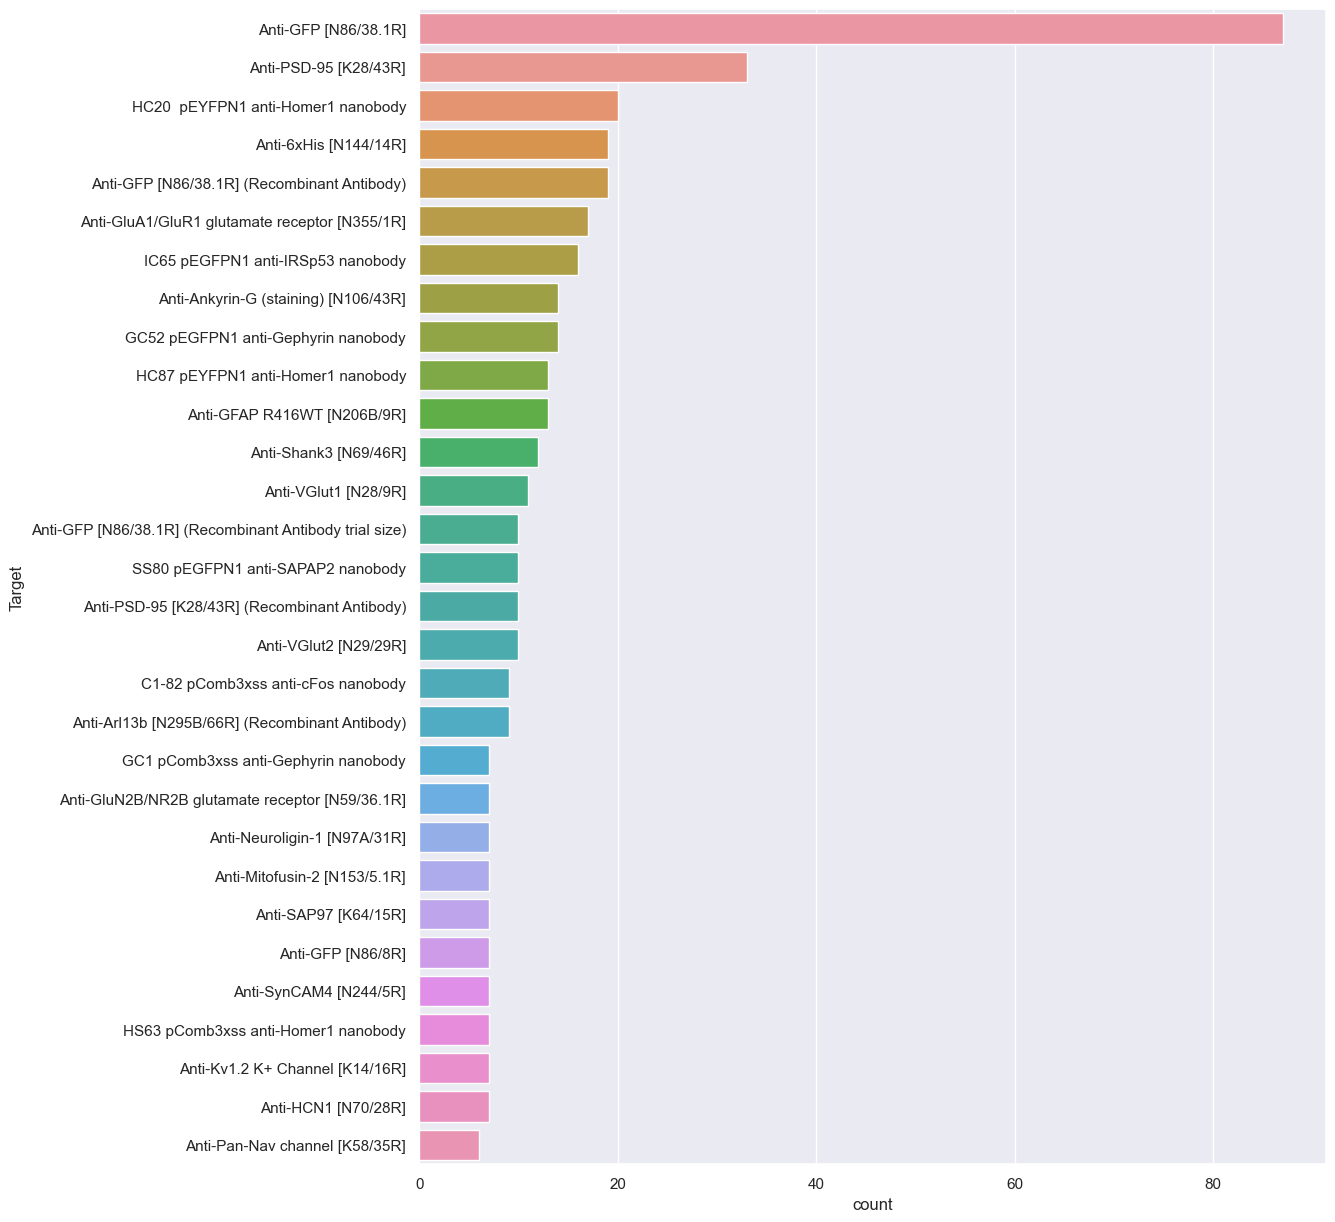

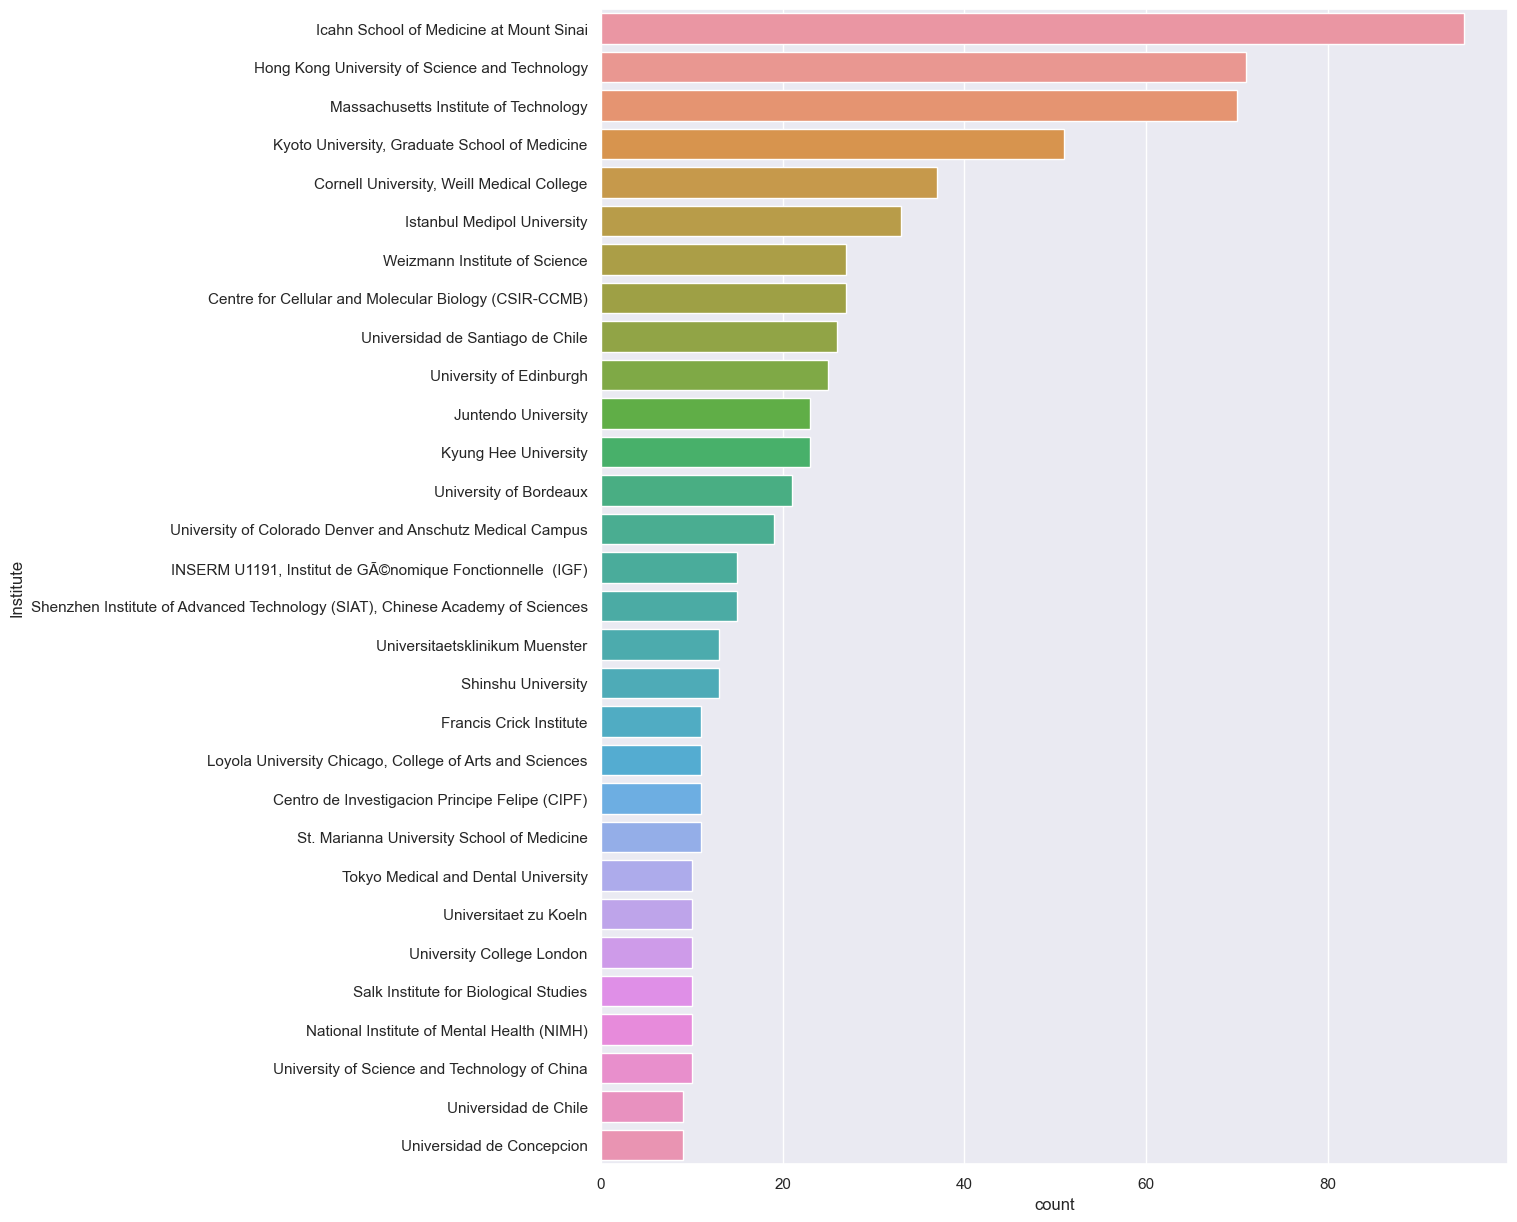

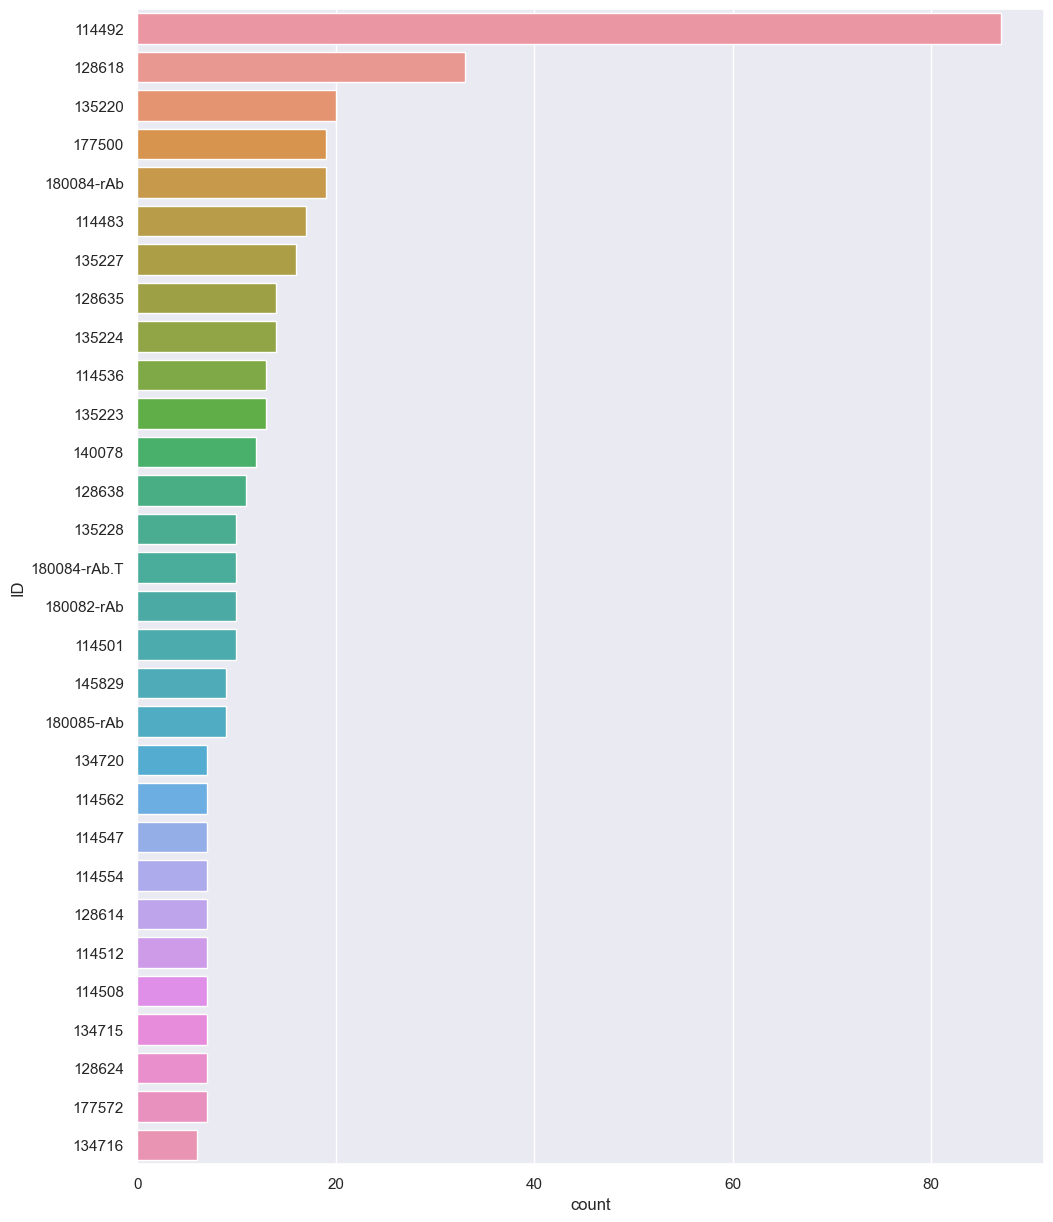

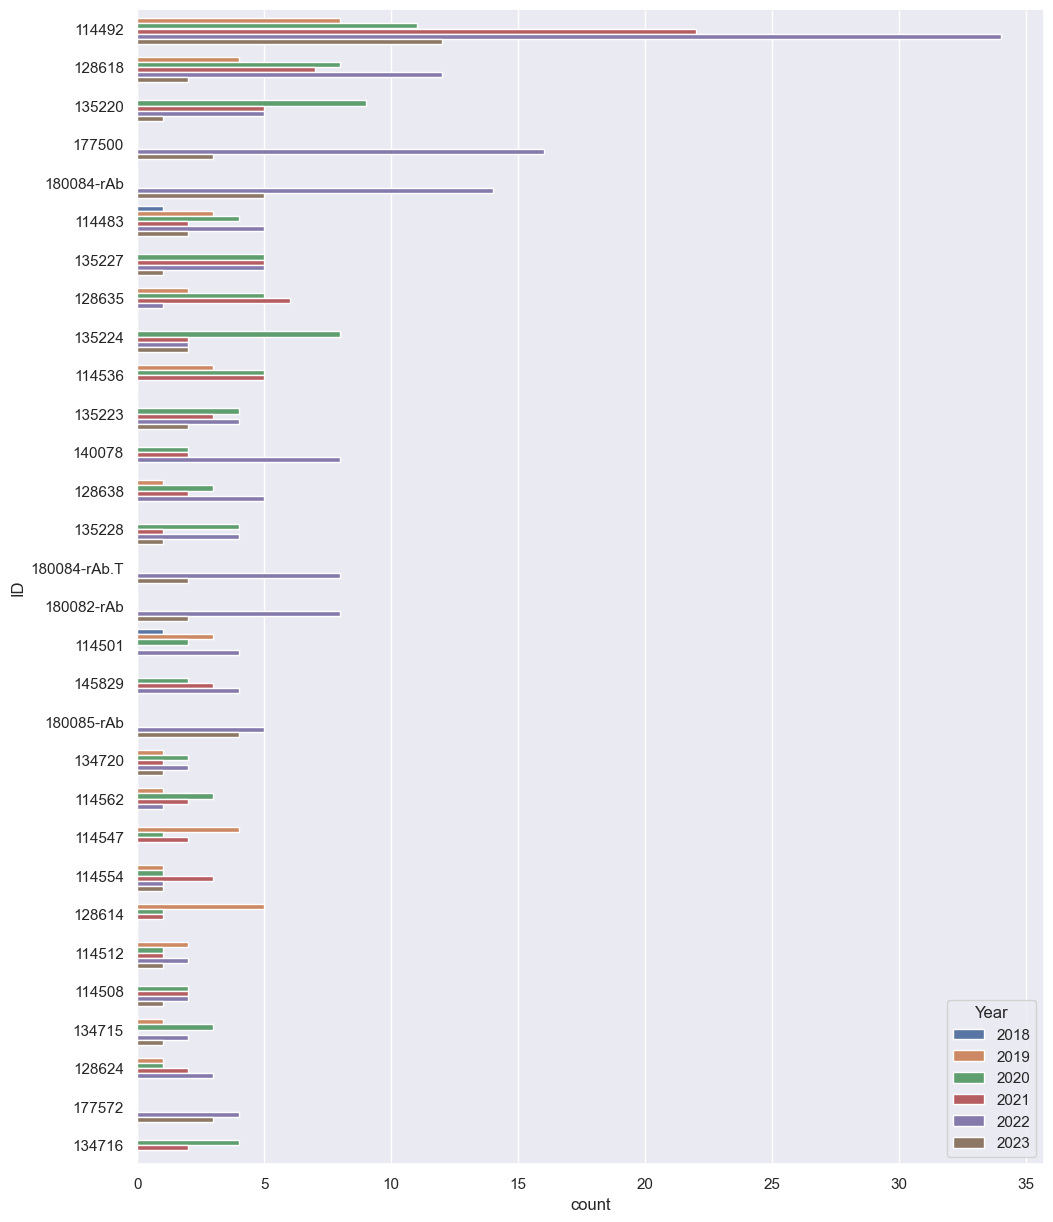

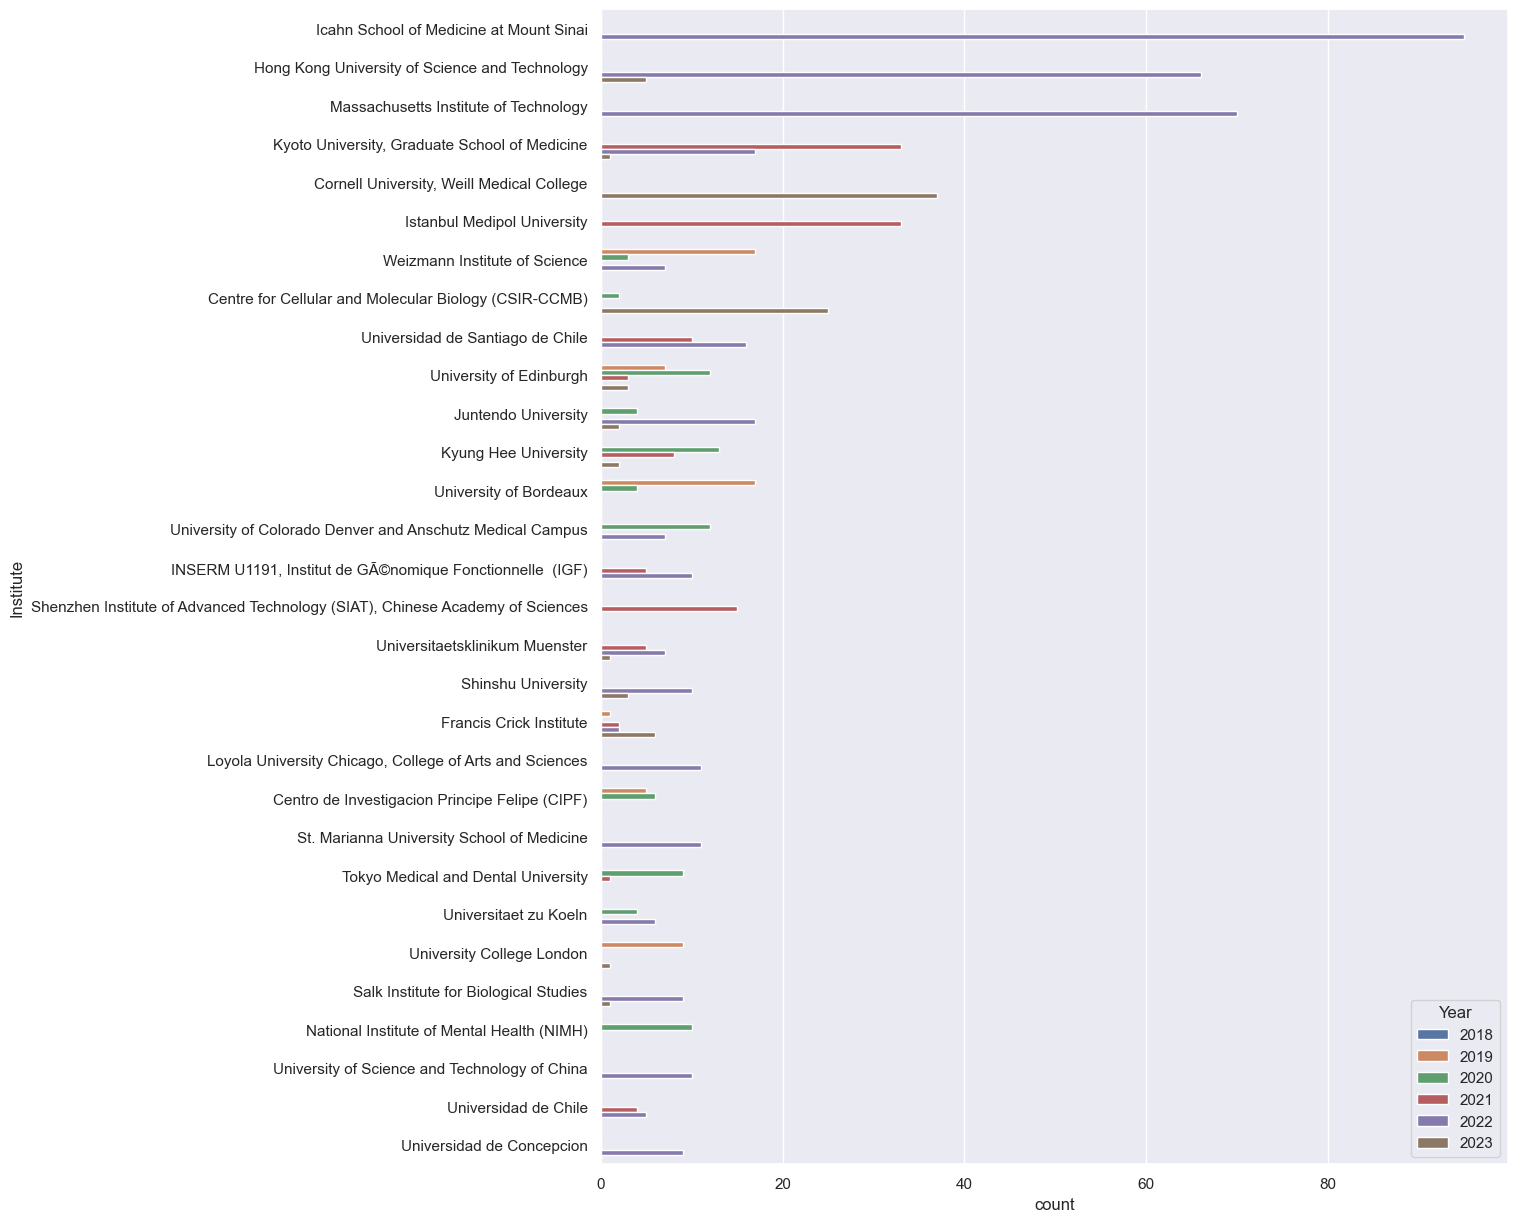

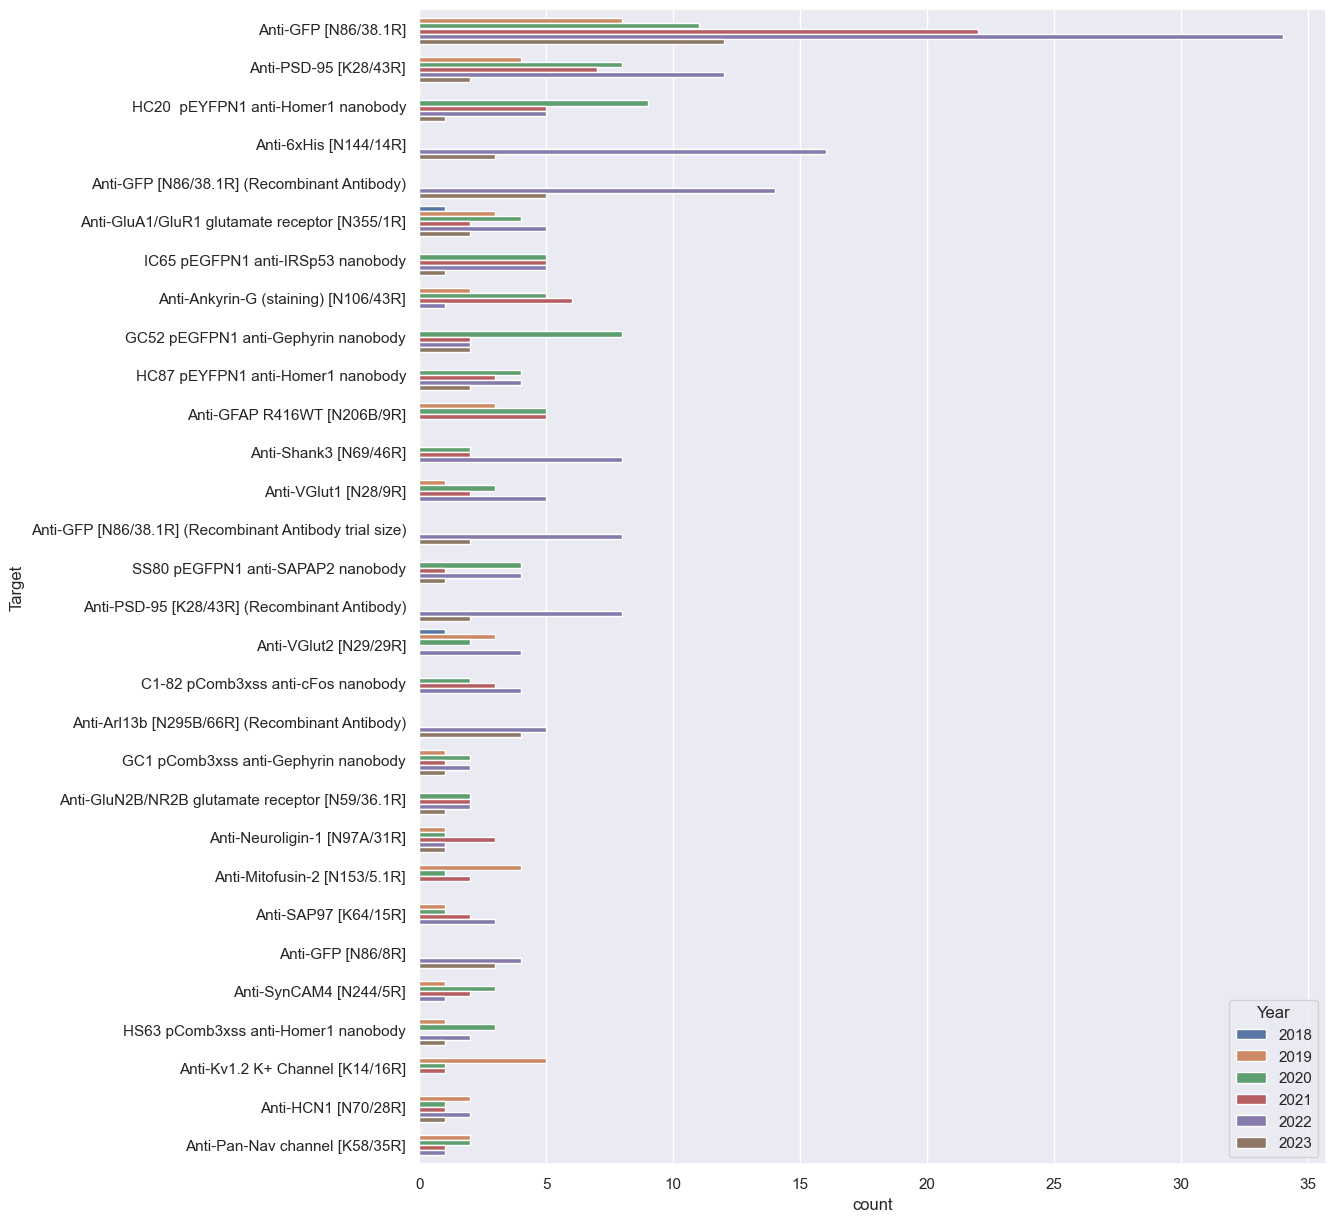

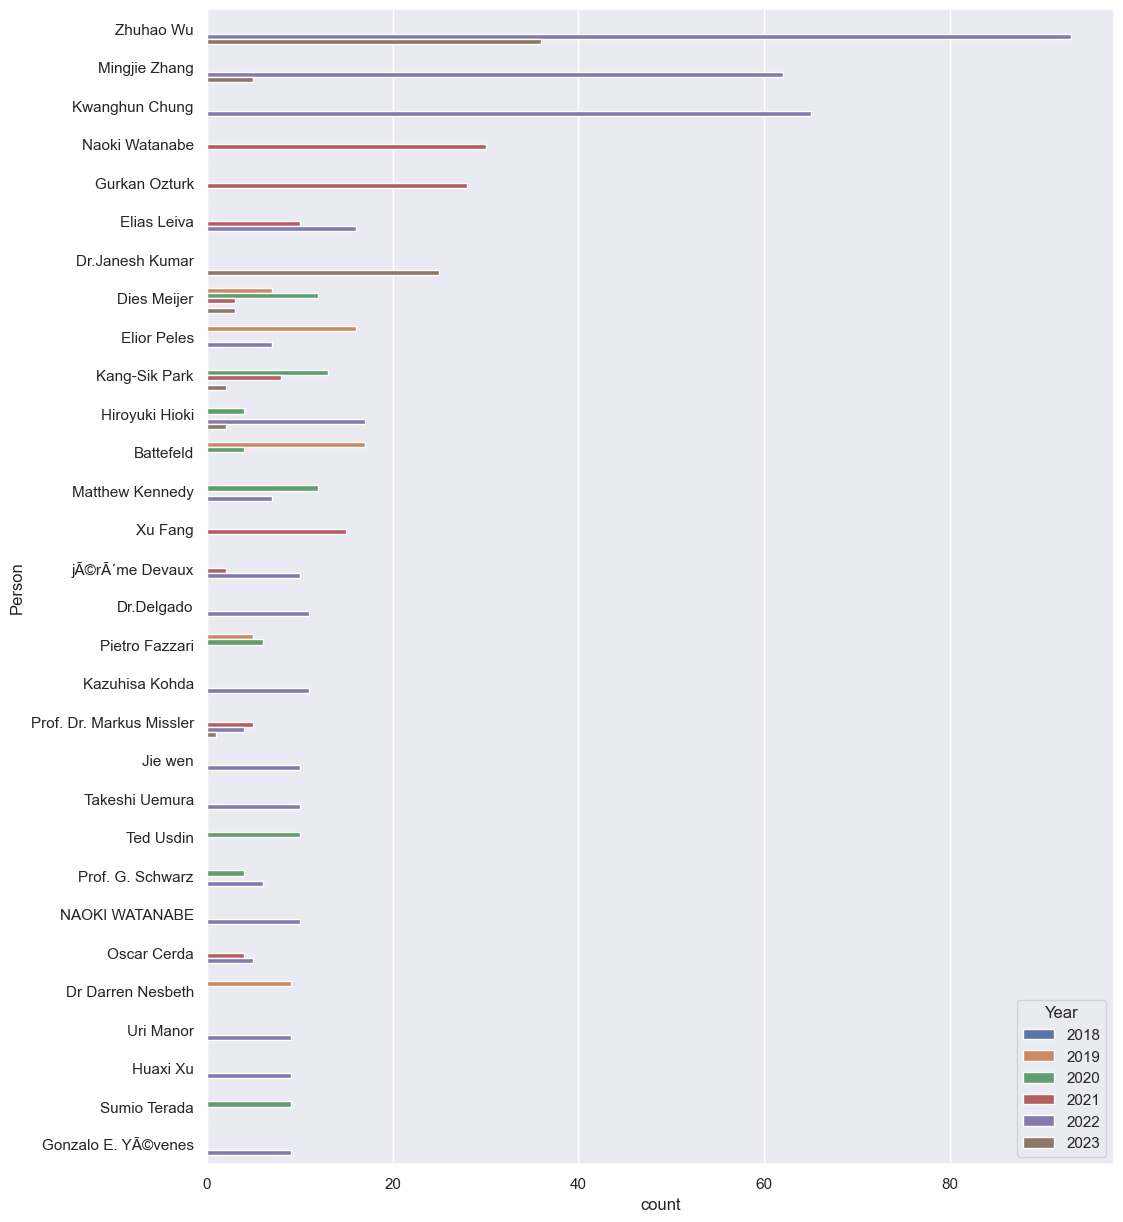

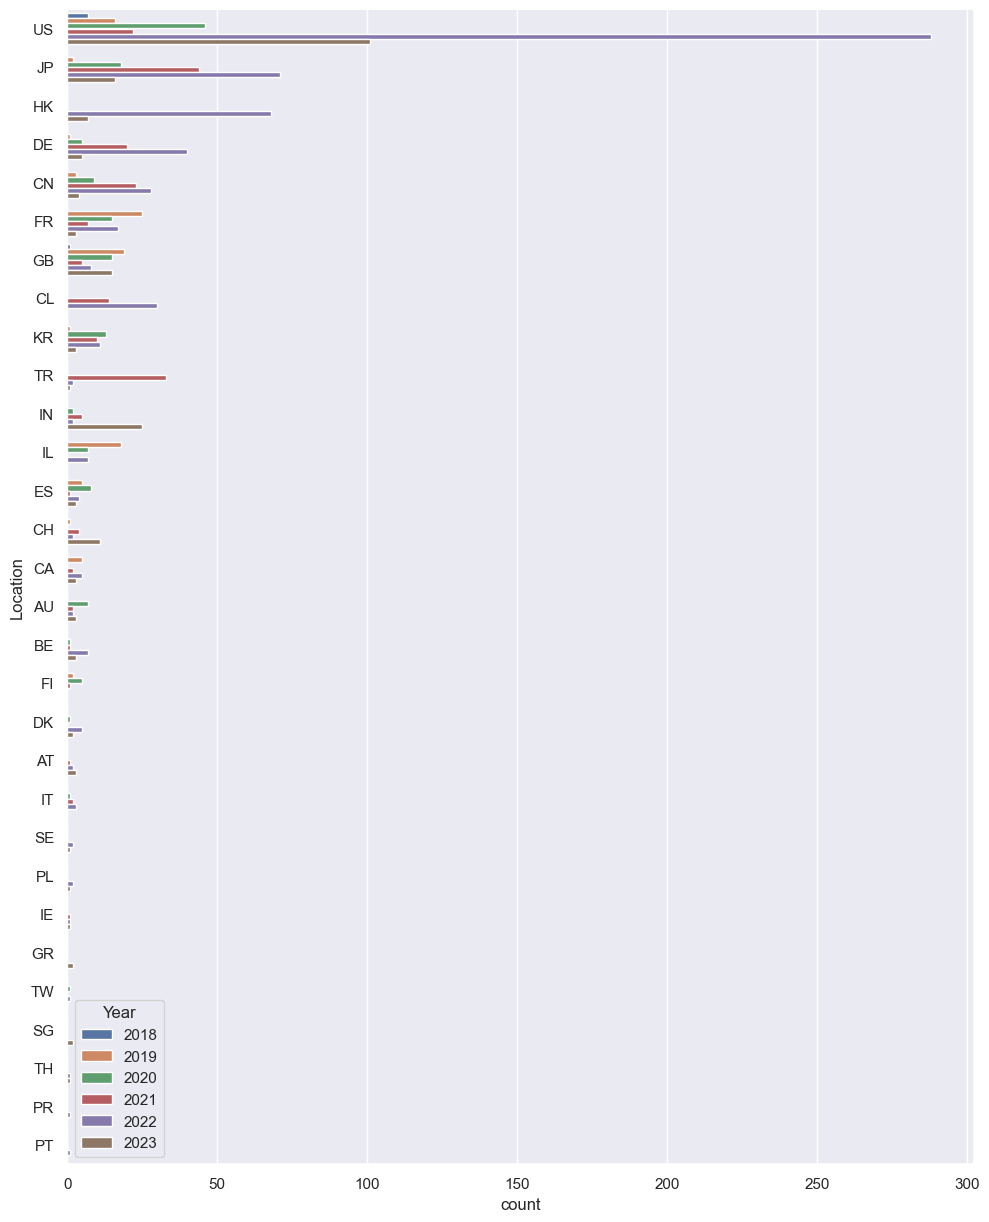

In [55]:
# generate some graphs to see what the data looks like from the dataframe above
# first, let's see how many orders were placed by each person
# we can use the value_counts() method to do this
df['Person'].value_counts()
# now make a graph of this using seaborn and filter to the top 30 results
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Person", data=df, order=df['Person'].value_counts().iloc[:30].index)
# do the same as above but for the target column and the institute column
plt.show()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Target", data=df, order=df['Target'].value_counts().iloc[:30].index)
plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Institute", data=df, order=df['Institute'].value_counts().iloc[:30].index)
plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="ID", data=df, order=df['ID'].value_counts().iloc[:30].index)
plt.show()

# do the graph above but also color based on the year from the data columns
# first, we need to extract the year from the date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()
# now we can use the hue parameter to color the graph based on the year
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="ID", data=df, order=df['ID'].value_counts().iloc[:30].index, hue="Year")
plt.show()


# same but for institute, target, and person and make the graph look nice

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Institute", data=df, order=df['Institute'].value_counts().iloc[:30].index, hue="Year")
plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Target", data=df, order=df['Target'].value_counts().iloc[:30].index, hue="Year")
plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Person", data=df, order=df['Person'].value_counts().iloc[:30].index, hue="Year")
plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,15)})
ax = sns.countplot(y="Location", data=df, order=df['Location'].value_counts().iloc[:30].index, hue="Year")
plt.show()


In [87]:
# increase display size of tables in the notebook and create a table of the top 50 people who ordered the most based on each year as a column and sort values based on the row sum after tr
             
pd.set_option('display.max_rows', 0)
yearlypi = df.groupby('Year')['Person'].value_counts().unstack().fillna(0).astype(int).T
yearlyins = df.groupby('Year')['Institute'].value_counts().unstack().fillna(0).astype(int).T

# now sort this based on row sum
yearlypi.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/yearlypi.csv')
yearlyins.to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/yearlyins.csv')

#pd.DataFrame(df['Person'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/toppeople.csv')
#pd.DataFrame(df['Institute'].value_counts()).to_csv('/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/orderinganalysis/topins.csv')

In [105]:
nmab = pd.read_csv("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/final_df.csv")
nmab

,Unnamed: 0,title,title_link,publication_info,snippet,cited_by_link,cited_by_count,pdf_file,year
0,0,Preoperative and Postoperative Growth Rates in...,https://onlinelibrary.wiley.com/doi/abs/10.117...,"J Wazen, H Silverstein, H Norrell… - … –Head a...",Sequential computerized tomography (CT) allows...,https://scholar.google.com/scholar?cites=15010...,138.0,NaN,1985
1,0,Sensory nerve neuromas—leading to failed foot ...,https://journals.sagepub.com/doi/pdf/10.1177/1...,"JE Kenzora - Foot & Ankle, 1986 - journals.sag...",Sensory nerve neuromas caused by incisions on ...,https://scholar.google.com/scholar?cites=86070...,51.0,NaN,1986
2,1,Development of an indirect flight muscle in a ...,https://www.sciencedirect.com/science/article/...,"WJ Costello, RJ Wyman - Developmental biology,...",Stripe (sr) is a highly specific mutant affect...,https://scholar.google.com/scholar?cites=21302...,67.0,NaN,1986
3,2,Present status of lasers in neurosurgery,https://link.springer.com/chapter/10.1007/978-...,"JM Tew, WD Tobler - Advances and technical sta...",The application of laser technology to medicin...,https://scholar.google.com/scholar?cites=11914...,31.0,NaN,1986
4,0,Postamputation neuromas and other symptomatic ...,https://pubs.rsna.org/doi/abs/10.1148/radiolog...,"RD Singson, F Feldman, CW Slipman, E Gonzalez…...",One of the potentially troublesome sequelae of...,https://scholar.google.com/scholar?cites=23709...,43.0,NaN,1987
5,1,Hypoglossal‐facial nerve anastomosis and elect...,https://onlinelibrary.wiley.com/doi/abs/10.128...,"PE Hammerschlag, J Brudny, R Cusumano… - The …...",Electromyographic (EMG) feedback has been prop...,https://scholar.google.com/scholar?cites=10987...,56.0,https://onlinelibrary.wiley.com/doi/pdf/10.128...,1987
6,2,The numbers of unmyelinated and myelinated axo...,https://www.sciencedirect.com/science/article/...,"DA Carter, SJW Lisney - Journal of the neurolo...",Counts have been made of the numbers of unmyel...,https://scholar.google.com/scholar?cites=11981...,57.0,NaN,1987
7,3,Magnetic resonance imaging of head and neck tu...,https://link.springer.com/content/pdf/10.1007/...,"KE Kortman, JT Helsper, WS Wong… - Cancers of ...",Effective therapy of head and neck tumors depe...,NaN,NaN,http://ndl.ethernet.edu.et/bitstream/123456789...,1987
8,4,"[CITATION][C] Radiology of ear, nose and throat",NaN,"PD Phelps - … Otolaryngology, Scott-Brown's Ot...",NaN,https://scholar.google.com/scholar?cites=19387...,4.0,NaN,1987
...,...,...,...,...,...,...,...,...,...


In [102]:
# turn the dictionary of lists into a data frame with the key as a column
nmab = pd.DataFrame.from_dict(nmab, orient='index')


In [103]:
nmab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574
1980,{'title': 'Neural tumors of the oral cavity: a...,{'title': 'The role of surgery in the manageme...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1981,{'title': 'Centrocentral anastomosis of periph...,{'title': 'Histopathology of the human endolym...,{'title': 'Tissue Characterization With Contra...,"{'title': '[CITATION][C] Amputation Neuromas',...",{'title': '[CITATION][C] Centrocentral Anastom...,{'title': 'MORPHOLOGICAL AND PHYSIOLOGICAL PLA...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1982,{'title': 'Sudden hearing loss: ten years' exp...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1983,{'title': 'Virus-host cell interaction in rat ...,"{'title': 'Pain and the sympathetic system', '...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1984,{'title': 'Effects of electrical and mechanica...,{'title': 'Parapharyngeal space masses: an upd...,{'title': 'Discharge pattern of afferent fiber...,{'title': 'Le transfert à partir d'orteil dans...,"{'title': 'The laser: history, biophysics, and...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1985,{'title': 'Preoperative and Postoperative Grow...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,

In [100]:
pd.DataFrame(nmab)

ValueError: All arrays must be of the same length